## Uber Supply-Demand Gap Case Study

**Business Objective:The aim of analysis is to identify the root cause of the problem and to find ways to improve the situation.**

In [1]:
#Bypass warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the required Libraries.
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Sourcing

In [3]:
#importing the dataset csvfile.
df = pd.read_csv("Uber Request Data.csv")
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


**Inspecting the dataframe**

In [4]:
df.shape

(6745, 6)

In [5]:
print("No. of Rows :",df.shape[0])
print("No. of Columns :",df.shape[1])

No. of Rows : 6745
No. of Columns : 6


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None


In [7]:
print(df.describe())

        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000


**Inspecting duplicate rows in the dataset**

In [8]:
#Count the number of duplicate rows.
print("The number of duplicate rows :",df.duplicated().sum())

The number of duplicate rows : 0


In [9]:
#Count the number of non-duplicate rows.
print("The number of non-duplicate rows :",(~df.duplicated()).sum())

The number of non-duplicate rows : 6745


In [10]:
# Hence, the number of duplicate rows are zero.
print("We can proceed now as there is no duplicate rows in our dataset.")

We can proceed now as there is no duplicate rows in our dataset.


**Inspecting null values in dataset**

In [11]:
df.isna().sum()
#We can observe that "Driver id" and "Drop timestamp" have null values.

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

**Inspecting % of null values columnwise**

In [12]:
(df.isnull().sum()*100)/df.shape[0]
#We can see that huge amount of null values are there in "Driver id" and "Drop timestamp".

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

## Data Cleaning

In [13]:
#In dataset,'Request timestamp' and 'Drop timestamp' is object type.
df.info()
#We have to convert 'Request timestamp' and 'Drop timestamp' Columns to datetime Dtype by creating new column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [14]:
#Let's convert 'Request timestamp' to datetime Dtype by creating new column.
df['Request Date Time'] = pd.to_datetime(df['Request timestamp'],dayfirst=True)
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date Time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00


In [15]:
#Let's convert 'Drop timestamp' to datetime Dtype by creating new column.
df['Drop Date Time'] = pd.to_datetime(df['Drop timestamp'],dayfirst=True)
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date Time,Drop Date Time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00,2016-07-11 07:25:00


In [16]:
#We can drop 'Request timestamp' and 'Drop timestamp' Columns as it is not required for further analysis.
df = df.drop('Request timestamp', axis=1)
df = df.drop('Drop timestamp', axis=1)
df.head(10)

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


**Inspecting the dataframe again after formatting(Cross Verification)**

In [17]:
df.info()
#We can see that now 'Request Date Time' and 'Drop Date Time' Columns are in datetime Dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request Date Time  6745 non-null   datetime64[ns]
 5   Drop Date Time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


## Data Wrangling

In [18]:
#Let's extract date and time from 'Request Date Time' as new column.
df['request_Date'] = df['Request Date Time'].dt.date
df['request_Time'] = df['Request Date Time'].dt.time

#Let's extract day of the week from 'Request Date Time' as new column.
df['request_DayOfWeek'] = df['Request Date Time'].apply(lambda x: dt.datetime.strftime(x, '%A'))

#Let's extract hour from 'Request Date Time' as new column.
df['request_hour'] = df['Request Date Time'].dt.hour

#Let's extract date and time from 'Drop Date Time' as new column.
df['drop_Date'] = df['Drop Date Time'].dt.date
df['drop_Time'] = df['Drop Date Time'].dt.time

df.head(10)

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,request_Date,request_Time,request_DayOfWeek,request_hour,drop_Date,drop_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,2016-07-13,09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,Wednesday,21,2016-07-13,22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,Thursday,6,2016-07-14,07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,Friday,5,2016-07-15,06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,Friday,17,2016-07-15,18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,Monday,6,2016-07-11,07:25:00


In [19]:
#Inspecting null values.
df['Request Date Time'].isna().sum()

0

In [20]:
#Let's derive slots for request hours.
df.loc[df['request_hour'].between(0,3, inclusive=True),'request_timeslot'] = 'Late night'
df.loc[df['request_hour'].between(4,6, inclusive=True),'request_timeslot'] = 'Early morning'
df.loc[df['request_hour'].between(7,12, inclusive=True),'request_timeslot'] = 'Morning'
df.loc[df['request_hour'].between(13,17, inclusive=True),'request_timeslot'] = 'Afternoon'
df.loc[df['request_hour'].between(18,20, inclusive=True),'request_timeslot'] = 'Evening'
df.loc[df['request_hour'].between(21,24, inclusive=True),'request_timeslot'] = 'Night'
df.head(10)

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,request_Date,request_Time,request_DayOfWeek,request_hour,drop_Date,drop_Time,request_timeslot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,2016-07-11,13:00:00,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,2016-07-11,18:47:00,Afternoon
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,2016-07-12,09:58:00,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,2016-07-12,22:03:00,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,2016-07-13,09:25:47,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,Wednesday,21,2016-07-13,22:28:59,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,Thursday,6,2016-07-14,07:13:15,Early morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,Friday,5,2016-07-15,06:07:52,Early morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,Friday,17,2016-07-15,18:50:51,Afternoon
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,Monday,6,2016-07-11,07:25:00,Early morning


## Data Analysis

In [21]:
#Let's Analyze request dates.
print("Unique Dates are: ",df['request_Date'].unique())
print("Minimum Date: ", min(df['request_Date']))
print("Maximum Date: ", max(df['request_Date']))

Unique Dates are:  [datetime.date(2016, 7, 11) datetime.date(2016, 7, 12)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15)]
Minimum Date:  2016-07-11
Maximum Date:  2016-07-15


In [22]:
#Let's Analyze data by grouping over status.
df.groupby(df.Status).count()
#We can observe here the numbers of request id(s) for each status type.

,Request id,Pickup point,Driver id,Request Date Time,Drop Date Time,request_Date,request_Time,request_DayOfWeek,request_hour,drop_Date,drop_Time,request_timeslot
Status,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,1264,1264,0,0,1264
No Cars Available,2650,2650,0,2650,0,2650,2650,2650,2650,0,0,2650
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [23]:
#Let's analyze the data for which trip was either cancelled or no cab was available.
Null_Drop_Date_Time = df[df["Drop Date Time"].isnull()]
Null_Drop_Date_Time.head(10)

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,request_Date,request_Time,request_DayOfWeek,request_hour,drop_Date,drop_Time,request_timeslot
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,06:08:41,Wednesday,6,NaT,NaT,Early morning
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17:07:58,Thursday,17,NaT,NaT,Afternoon
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20:51:37,Thursday,20,NaT,NaT,Evening
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10:12:40,Friday,10,NaT,NaT,Morning
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19:14:00,Tuesday,19,NaT,NaT,Evening
2836,3806,Airport,2.0,Cancelled,2016-07-13 20:57:49,NaT,2016-07-13,20:57:49,Wednesday,20,NaT,NaT,Evening
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:38,NaT,2016-07-14,08:38:38,Thursday,8,NaT,NaT,Morning
2838,5023,Airport,2.0,Cancelled,2016-07-14 19:04:08,NaT,2016-07-14,19:04:08,Thursday,19,NaT,NaT,Evening
2839,80,City,3.0,Cancelled,2016-07-11 04:47:00,NaT,2016-07-11,04:47:00,Monday,4,NaT,NaT,Early morning
2840,534,City,3.0,Cancelled,2016-07-11 10:01:00,NaT,2016-07-11,10:01:00,Monday,10,NaT,NaT,Morning


In [24]:
#Let's analyze the data for which trip was completed.
Tripcompleted_Drop_Date_Time = df[~df["Drop Date Time"].isnull()]
Tripcompleted_Drop_Date_Time.head(10)

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,request_Date,request_Time,request_DayOfWeek,request_hour,drop_Date,drop_Time,request_timeslot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,2016-07-11,13:00:00,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,2016-07-11,18:47:00,Afternoon
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,2016-07-12,09:58:00,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,2016-07-12,22:03:00,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,2016-07-13,09:25:47,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,Wednesday,21,2016-07-13,22:28:59,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,Thursday,6,2016-07-14,07:13:15,Early morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,Friday,5,2016-07-15,06:07:52,Early morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,Friday,17,2016-07-15,18:50:51,Afternoon
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,Monday,6,2016-07-11,07:25:00,Early morning


**Cross Verification : Grouping data by status and verify counts**

In [25]:
Null_Drop_Date_Time.groupby(Null_Drop_Date_Time.Status).count()
#We will cross check this with 'df.groupby(df.Status).count()'

,Request id,Pickup point,Driver id,Request Date Time,Drop Date Time,request_Date,request_Time,request_DayOfWeek,request_hour,drop_Date,drop_Time,request_timeslot
Status,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,1264,1264,0,0,1264
No Cars Available,2650,2650,0,2650,0,2650,2650,2650,2650,0,0,2650


In [26]:
Tripcompleted_Drop_Date_Time.groupby(Tripcompleted_Drop_Date_Time.Status).count()
#We will cross check this with 'df.groupby(df.Status).count()'

,Request id,Pickup point,Driver id,Request Date Time,Drop Date Time,request_Date,request_Time,request_DayOfWeek,request_hour,drop_Date,drop_Time,request_timeslot
Status,,,,,,,,,,,,
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [27]:
df.groupby(df.Status).count()
#Cross Verification successful

,Request id,Pickup point,Driver id,Request Date Time,Drop Date Time,request_Date,request_Time,request_DayOfWeek,request_hour,drop_Date,drop_Time,request_timeslot
Status,,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,1264,1264,0,0,1264
No Cars Available,2650,2650,0,2650,0,2650,2650,2650,2650,0,0,2650
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [28]:
#Let's Analyze over Driverid with the help of Drop Date Time.
Driverid_Drop_Date_Time = df[~df["Driver id"].isnull()]
Driverid_Drop_Date_Time.head(10)

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,request_Date,request_Time,request_DayOfWeek,request_hour,drop_Date,drop_Time,request_timeslot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,2016-07-11,13:00:00,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,2016-07-11,18:47:00,Afternoon
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,2016-07-12,09:58:00,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,2016-07-12,22:03:00,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,2016-07-13,09:25:47,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,Wednesday,21,2016-07-13,22:28:59,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,Thursday,6,2016-07-14,07:13:15,Early morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,Friday,5,2016-07-15,06:07:52,Early morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,Friday,17,2016-07-15,18:50:51,Afternoon
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,Monday,6,2016-07-11,07:25:00,Early morning


In [29]:
Driverid_Null_Drop_Date_Time = Driverid_Drop_Date_Time[Driverid_Drop_Date_Time["Drop Date Time"].isnull()]
Driverid_Null_Drop_Date_Time.head(10)

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,request_Date,request_Time,request_DayOfWeek,request_hour,drop_Date,drop_Time,request_timeslot
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,06:08:41,Wednesday,6,NaT,NaT,Early morning
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17:07:58,Thursday,17,NaT,NaT,Afternoon
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20:51:37,Thursday,20,NaT,NaT,Evening
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10:12:40,Friday,10,NaT,NaT,Morning
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19:14:00,Tuesday,19,NaT,NaT,Evening
2836,3806,Airport,2.0,Cancelled,2016-07-13 20:57:49,NaT,2016-07-13,20:57:49,Wednesday,20,NaT,NaT,Evening
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:38,NaT,2016-07-14,08:38:38,Thursday,8,NaT,NaT,Morning
2838,5023,Airport,2.0,Cancelled,2016-07-14 19:04:08,NaT,2016-07-14,19:04:08,Thursday,19,NaT,NaT,Evening
2839,80,City,3.0,Cancelled,2016-07-11 04:47:00,NaT,2016-07-11,04:47:00,Monday,4,NaT,NaT,Early morning
2840,534,City,3.0,Cancelled,2016-07-11 10:01:00,NaT,2016-07-11,10:01:00,Monday,10,NaT,NaT,Morning


In [30]:
Groupby_request_date = df.groupby(['request_Date', 'Status']).count()
Groupby_request_date

Request id  Pickup point  Driver id  \
request_Date Status                                                   
2016-07-11   Cancelled                 262           262        262   
             No Cars Available         504           504          0   
             Trip Completed            601           601        601   
2016-07-12   Cancelled                 240           240        240   
             No Cars Available         505           505          0   
             Trip Completed            562           562        562   
2016-07-13   Cancelled                 270           270        270   
             No Cars Available         490           490          0   
             Trip Completed            577           577        577   
2016-07-14   Cancelled                 252           252        252   
             No Cars Available         571           571          0   
             Trip Completed            530           530        530   
2016-07-15   Cancelled                 240           240        240   
             No Cars Available         580           580          0   
             Trip Completed            561           561        561   

                                Request Date Time  Drop Date Time  \
request_Date Status                                                 
2016-07-11   Cancelled                        262               0   
             No Cars Available                504               0   
             Trip Completed                   601             601   
2016-07-12   Cancelled                        240               0   
             No Cars Available                505               0   
             Trip Completed                   562             562   
2016-07-13   Cancelled                        270               0   
             No Cars Available                490               0   
             Trip Completed                   577             577   
2016-07-14   Cancelled                        252               0   
             No Cars Available                571               0   
             Trip Completed                   530             530   
2016-07-15   Cancelled                        240               0   
             No Cars Available                580               0   
             Trip Completed                   561             561   

                                request_Time  request_DayOfWeek  request_hour  \
request_Date Status                                                             
2016-07-11   Cancelled                   262                262           262   
             No Cars Available           504                504           504   
             Trip Completed              601                601           601   
2016-07-12   Cancelled                   240                240           240   
             No Cars Available           505                505           505   
             Trip Completed              562                562           562   
2016-07-13   Cancelled                   270                270           270   
             No Cars Available           490                490           490   
             Trip Completed              577                577           577   
2016-07-14   Cancelled                   252                252           252   
             No Cars Available           571                571           571   
             Trip Completed              530                530           530   
2016-07-15   Cancelled                   240                240           240   
             No Cars Available           580                580           580   
             Trip Completed              561                561           561   

                                drop_Date  drop_Time  request_timeslot  
request_Date Status                                                     
2016-07-11   Cancelled                  0          0               262  
             No Cars Available          0          0 

**Cross Verification : Request Date**

In [31]:
x =df.groupby('request_Date').count()
x.head()

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,request_Time,request_DayOfWeek,request_hour,drop_Date,drop_Time,request_timeslot
request_Date,,,,,,,,,,,,
2016-07-11,1367,1367,863,1367,1367,601,1367,1367,1367,601,601,1367
2016-07-12,1307,1307,802,1307,1307,562,1307,1307,1307,562,562,1307
2016-07-13,1337,1337,847,1337,1337,577,1337,1337,1337,577,577,1337
2016-07-14,1353,1353,782,1353,1353,530,1353,1353,1353,530,530,1353
2016-07-15,1381,1381,801,1381,1381,561,1381,1381,1381,561,561,1381


## Data Visualization

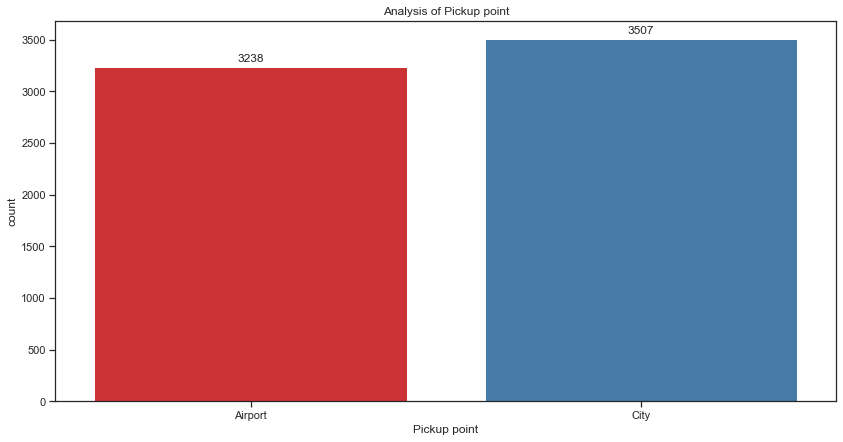

In [32]:
#Analyzing Pickup point.
sns.set(style="ticks")
plt.figure(figsize=(14, 7))
plt.title('Analysis of Pickup point')
ax = sns.countplot(x="Pickup point", data=df,palette="Set1")
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, value, ha="center")
plt.show()
#There is almost similar requests of airport and city as there is not a huge difference.

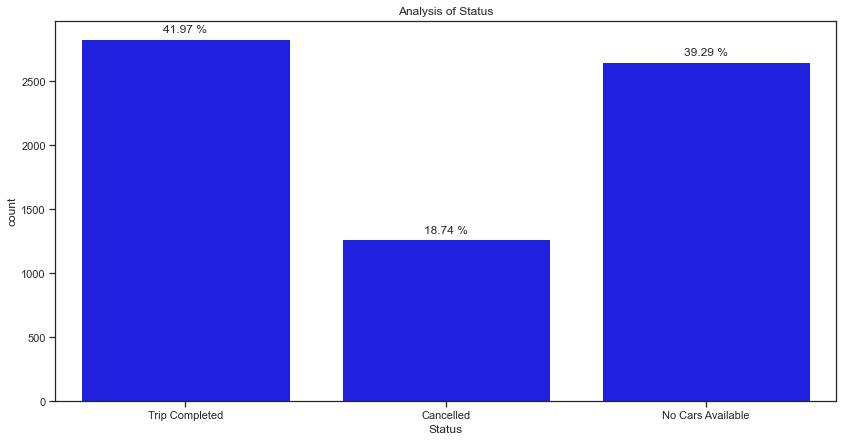

In [33]:
#Analyzing status.
sns.set(style="ticks")
plt.figure(figsize=(14, 7))
plt.title('Analysis of Status')
ax =sns.countplot(x="Status", data=df,palette=sns.color_palette(['blue']))
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()
#Less than 50% requests from city and airport gets completed. Only 41.97% Trips got completed out of 100%.

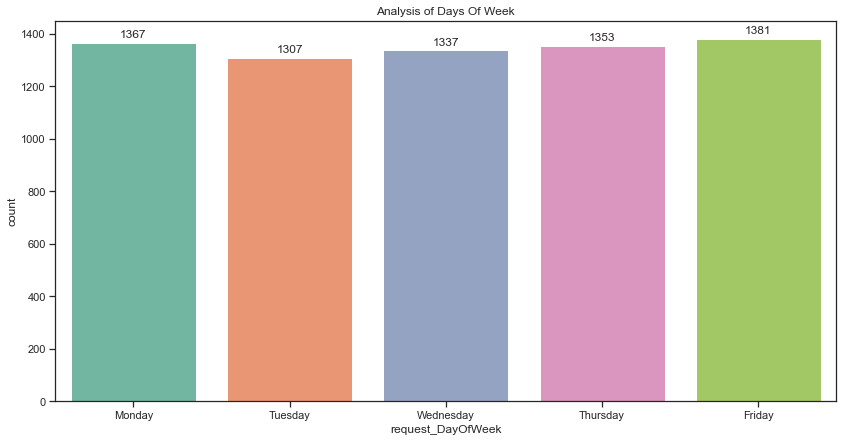

In [34]:
#Analyzing request count vs days of week.
sns.set(style="ticks")
plt.figure(figsize=(14, 7))
plt.title('Analysis of Days Of Week')
ax =sns.countplot(x='request_DayOfWeek', data=df, palette="Set2")
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+20
    ax.text(X, Y, value, ha="center")
plt.show()
#There is almost similar requests vs days of the week as there is not a huge difference.

<AxesSubplot:title={'center':'Analysis Of Request Hours'}, xlabel='request_hour', ylabel='count'>

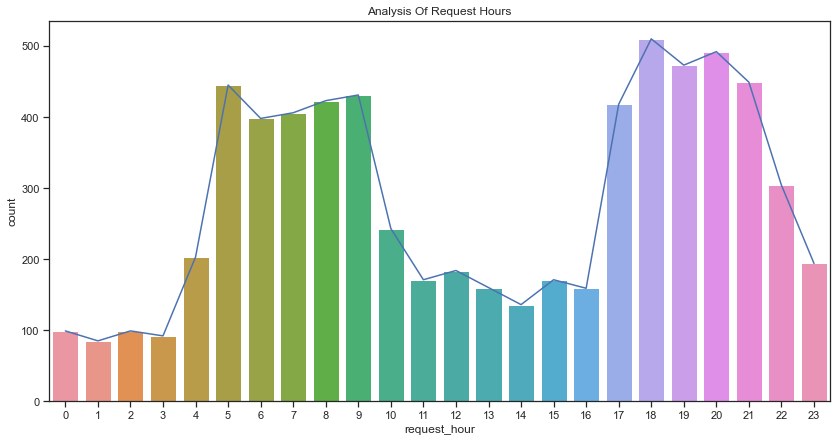

In [35]:
#Analyzing request hours
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(14,7))
plt.title('Analysis Of Request Hours')
df.groupby(df['request_hour']).count()['Request id'].plot(ax=ax)
sns.countplot(df['request_hour'])
#There are high request rates from 5am to 9am and 5pm to 10 pm as they are rush hours.

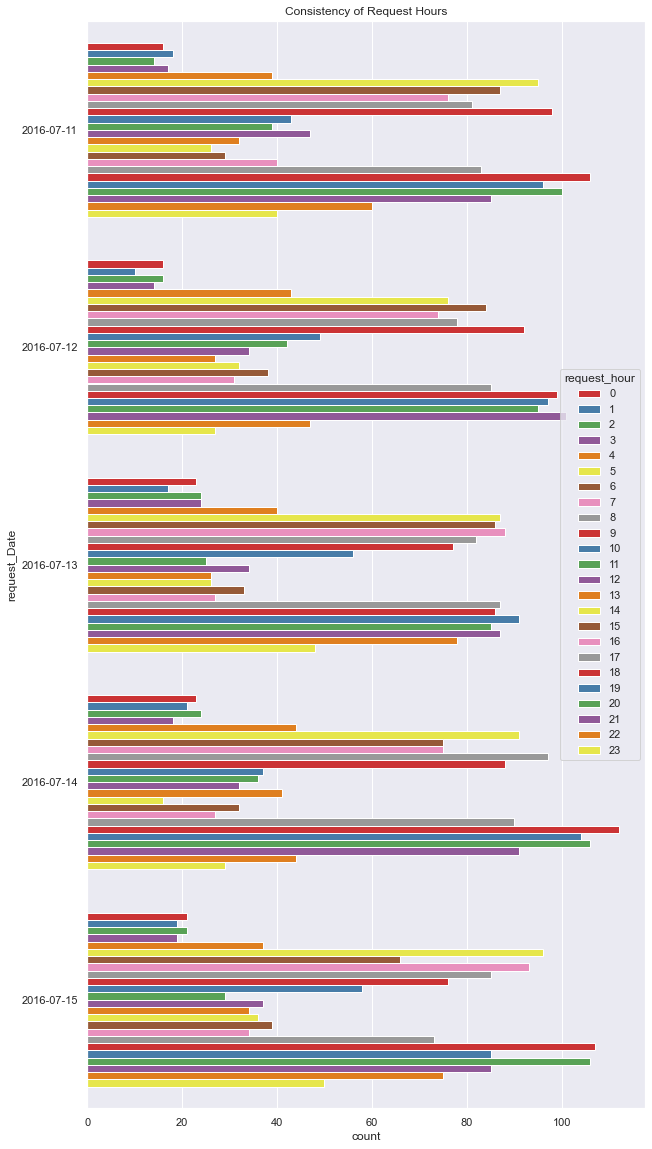

In [36]:
#Analyzing the high request rates from 5am to 9am and 5pm to 10 pm is consistent throughout all days or not
sns.set(style="darkgrid")
plt.figure(figsize=(10,20))
plt.title('Consistency of Request Hours')
sns.countplot(y='request_Date',hue="request_hour", data=df, palette="Set1")
plt.show()
#Yes, it is consistent. All dates high request rates is around the same time 5am to 9am and 5pm to 10 pm

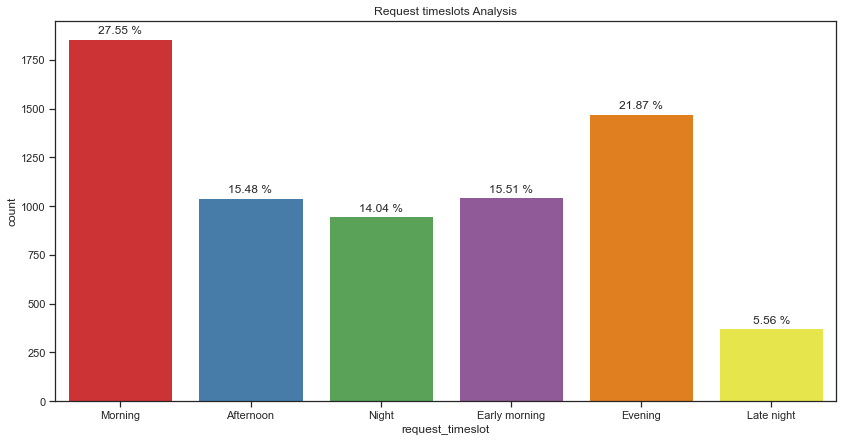

In [37]:
#Analyzing request timeslots
sns.set(style="ticks")
plt.figure(figsize=(14, 7))
plt.title('Request timeslots Analysis')
ax =sns.countplot(x='request_timeslot', data=df,palette="Set1")
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+25
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()
#Most of the requests are raised at morning(27.55%) and evening(21.87%) slots which rush hours
#As we have also seen that high request rates are from 5am to 9am and 5pm to 10 pm

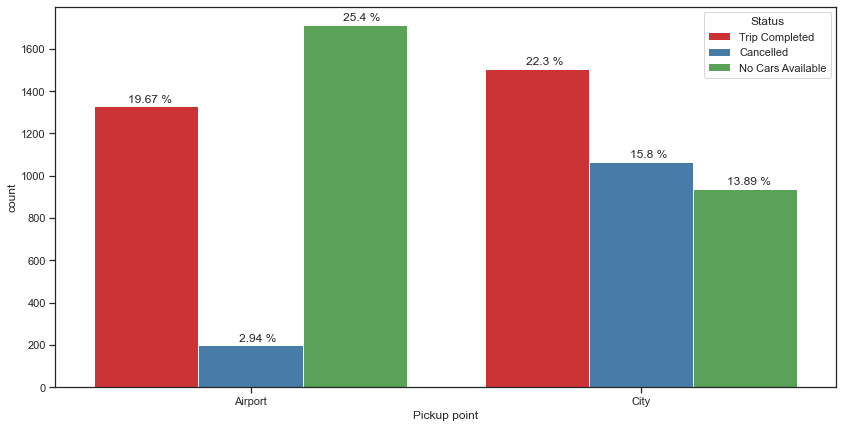

In [38]:
#Analyzing pickup point over status
sns.set(style="ticks")
plt.figure(figsize=(14, 7))
ax =sns.countplot(x='Pickup point', hue="Status", data=df,palette="Set1")
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.2
    Y = p.get_height()+20
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

#There are no cars available for most of the Airport pickup requests
#City pickup requests are getting more cancelled than Airport pickup requests

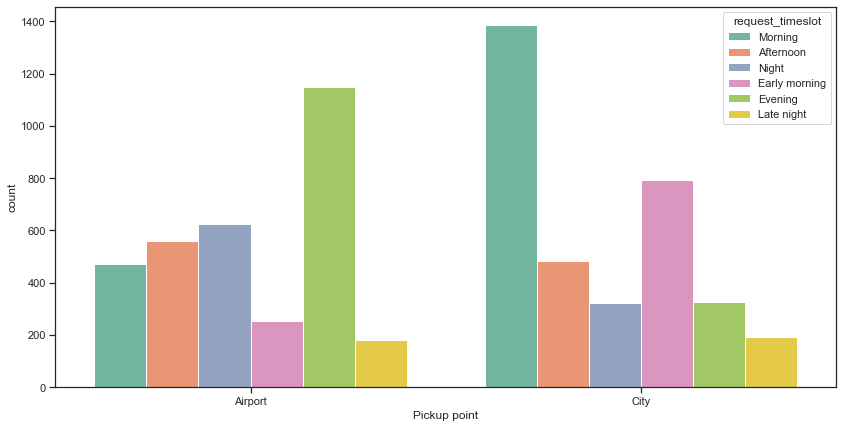

In [39]:
#Analyzing pickup point over time slot.
sns.set(style="ticks")
plt.figure(figsize=(14, 7))
sns.countplot(x='Pickup point', hue="request_timeslot", data=df, palette="Set2")
plt.show()
# Most requests from Airports are made in the evening while most requests from City are made in the morning

<Figure size 1008x504 with 0 Axes>

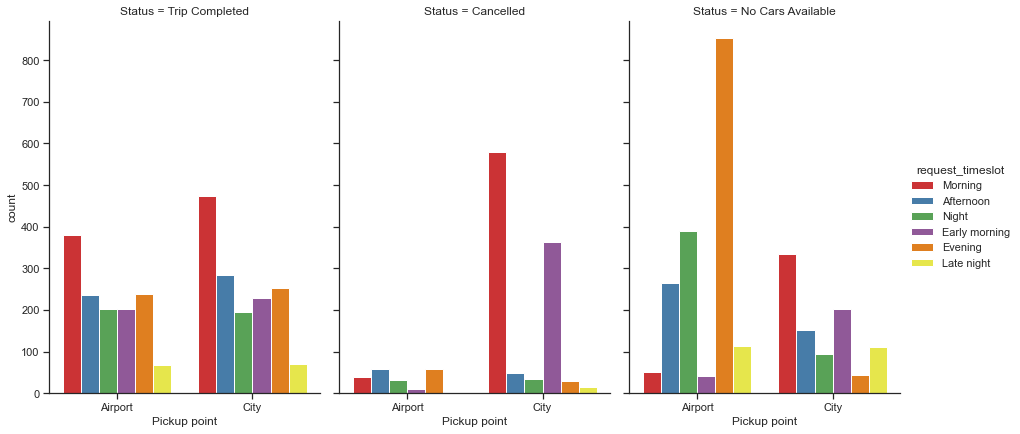

In [40]:
#Analyzing the timeslot vs Status and pickup point both at once.
sns.set(style="ticks")
plt.figure(figsize=(14, 7))
sns.catplot(x='Pickup point',col="Status", hue = 'request_timeslot',data=df ,kind="count",
            height=6,aspect= 0.7,ci=85,col_wrap=3,palette="Set1",margin_titles=True)
plt.show()

# There are no cars available at Airport requests in the evening.
# In the morning slot, Most of the city requests get cancelled.
# In both the cases,Airport and City, highest request rates are observed at that time only.

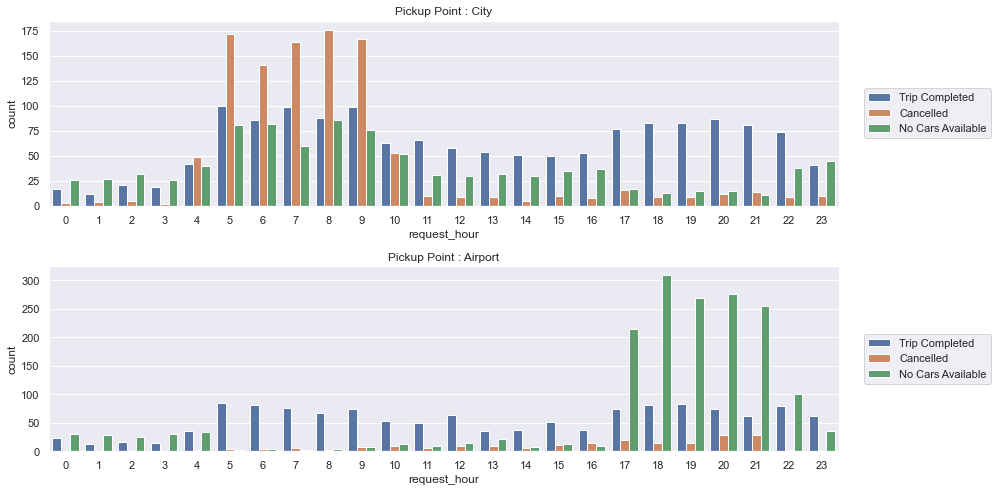

In [41]:
# Analyzing status for airport to city and city to airport trips.

Pickup_city = df[df['Pickup point']=="City"]
Pickup_airport = df[df['Pickup point']=="Airport"]

sns.set(style="darkgrid")
f = plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.title("Pickup Point : City")
sns.countplot(x='request_hour',hue='Status',data= Pickup_city )
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.subplot(2,1,2)
plt.title("Pickup Point : Airport")
sns.countplot(x='request_hour',hue='Status',data= Pickup_airport)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.tight_layout()

## Supply and Demand Gap Analysis

In [42]:
#creating demand column
df.loc[(df.Status == 'Trip Completed') | (df.Status == 'Cancelled')| (df.Status == 'No Cars Available'), 'demand'] = 'Demand'

#creating supply column
df.loc[(df.Status == 'Trip Completed'), 'supply'] = 'Supply'

#creating gap column
df.loc[(df.Status == 'Cancelled')| (df.Status == 'No Cars Available'), 'gap'] = 'Gap'

df.head(10)

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,request_Date,request_Time,request_DayOfWeek,request_hour,drop_Date,drop_Time,request_timeslot,demand,supply,gap
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,2016-07-11,13:00:00,Morning,Demand,Supply,NaN
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,2016-07-11,18:47:00,Afternoon,Demand,Supply,NaN
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,2016-07-12,09:58:00,Morning,Demand,Supply,NaN
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,2016-07-12,22:03:00,Night,Demand,Supply,NaN
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,2016-07-13,09:25:47,Morning,Demand,Supply,NaN
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,Wednesday,21,2016-07-13,22:28:59,Night,Demand,Supply,NaN
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,Thursday,6,2016-07-14,07:13:15,Early morning,Demand,Supply,NaN
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,Friday,5,2016-07-15,06:07:52,Early morning,Demand,Supply,NaN
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,Friday,17,2016-07-15,18:50:51,Afternoon,Demand,Supply,NaN
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,Monday,6,2016-07-11,07:25:00,Early morning,Demand,Supply,NaN


In [43]:
#Analyze demand count
print("Demand count : ",df['demand'].count())

#Analyze supply count
print("Supply count : ",df['supply'].count())

#Analyze gap count
print("Gap count : ",df['gap'].count())

Demand count :  6745
Supply count :  2831
Gap count :  3914


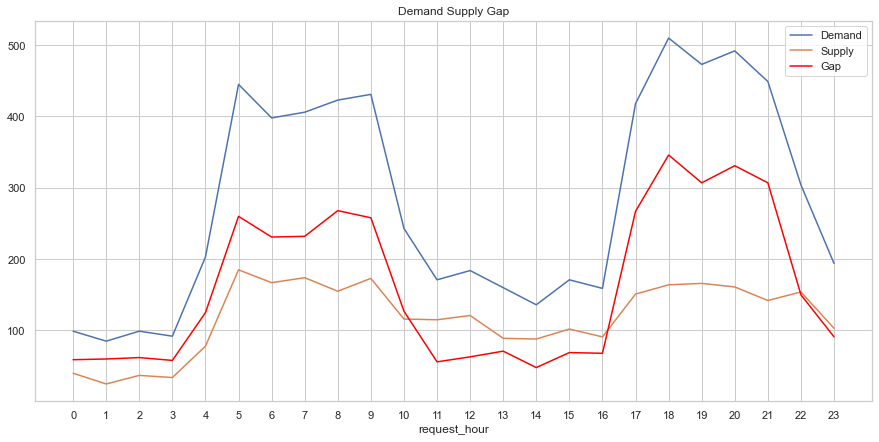

In [44]:
#plot data to show demand supply gap.
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
df.groupby(df['request_hour']).count()['Request id'].plot(ax=ax, label='Demand')
df[df['Status']=="Trip Completed"].groupby(df[df['Status']=="Trip Completed"]['request_hour']).count()['Request id'].plot(ax=ax, label='Supply')
(df.groupby(df['request_hour']).count()['Request id'] - df[df['Status']=="Trip Completed"].groupby(df[df['Status']=="Trip Completed"]['request_hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap")
plt.legend()
# There exists a huge gap(>50%) that can increase the revenue.

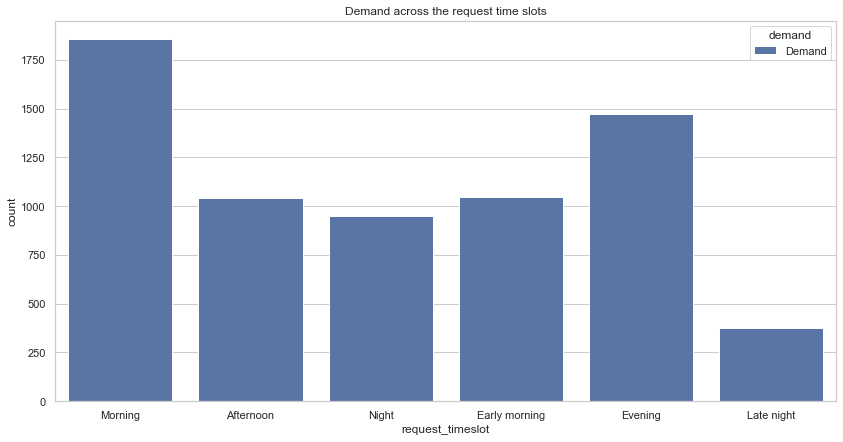

In [45]:
#Analyzing demand across the request time slots.
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
plt.title('Demand across the request time slots')
sns.countplot(hue='demand',x="request_timeslot", data=df)
plt.show()
# From the below plot we can be more clarified that morning slot and evening slot has the highest demand for cabs

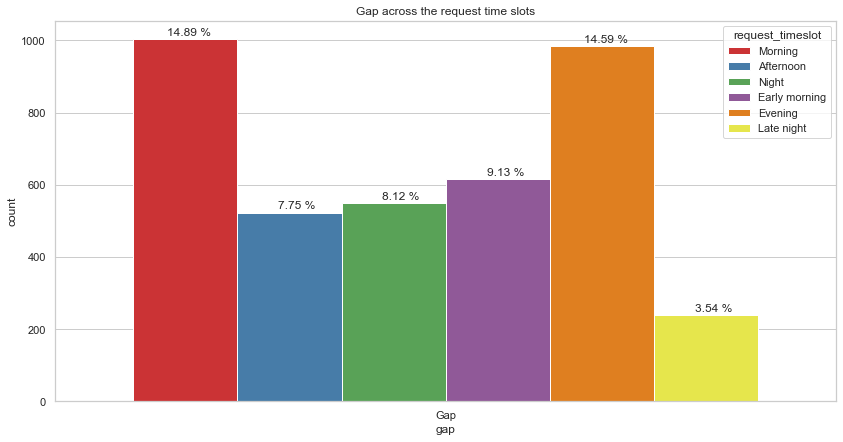

In [46]:
#Analyzing gap across the request time slots.
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
plt.title('Gap across the request time slots')
ax =sns.countplot(x='gap',hue="request_timeslot", data=df,palette="Set1")
total = len(df['gap'])
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.1
    Y = p.get_height()+10
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()
# Around 15% gap exists during morning slot and evening slot
# Insights from below plot matches with all our above findings that gap is mostly observed in the morning slot and evening slot

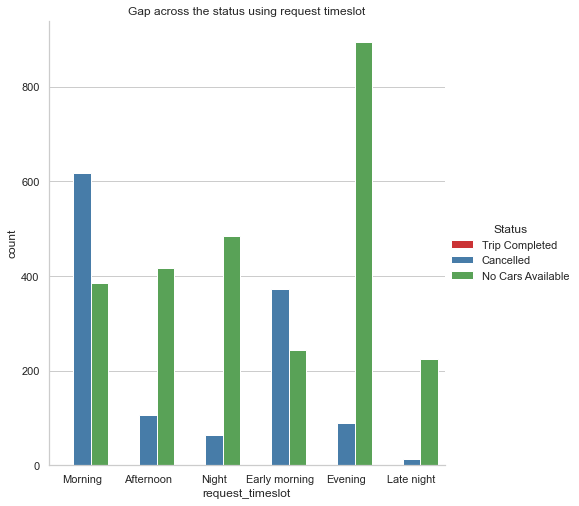

In [47]:
#Analyzing gap across the status using request timeslot
sns.set(style="whitegrid")
sns.catplot(x='request_timeslot',col="gap", hue ='Status',data=df ,kind="count", height=7,aspect= 0.9,ci=85,palette="Set1")
plt.title('Gap across the status using request timeslot')
plt.show()
# In Morning slot, highest 'cancelled' gap is observed
# In Evening slot, highest 'No car available' gap is observed
# There is no plotting for trip completed as gap is sum of cancelled and No cars available 

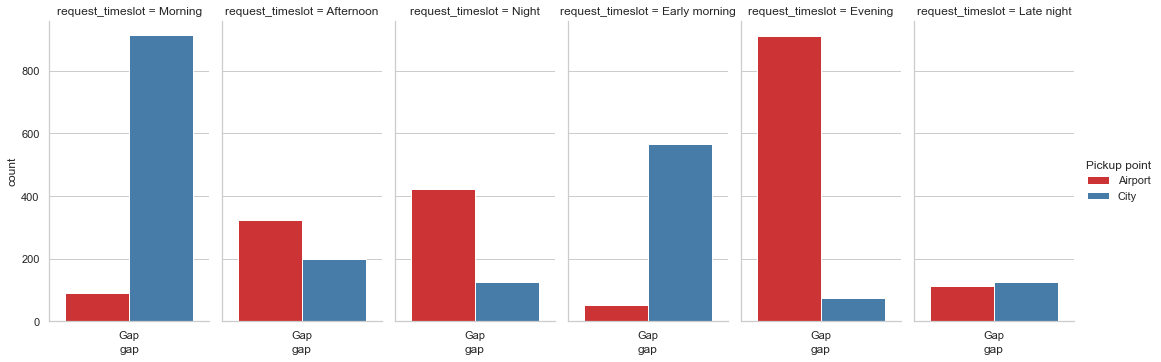

In [48]:
#segmenting gap across the pickup point and request timeslot
sns.catplot(x='gap',col="request_timeslot", hue = 'Pickup point',data=df, kind="count",
            height=5,aspect= 0.5, ci=85, palette="Set1")
plt.show()
# Airport pickup has the highest gap in the evening time slot
# City pickup has the highest gap in the morning slot

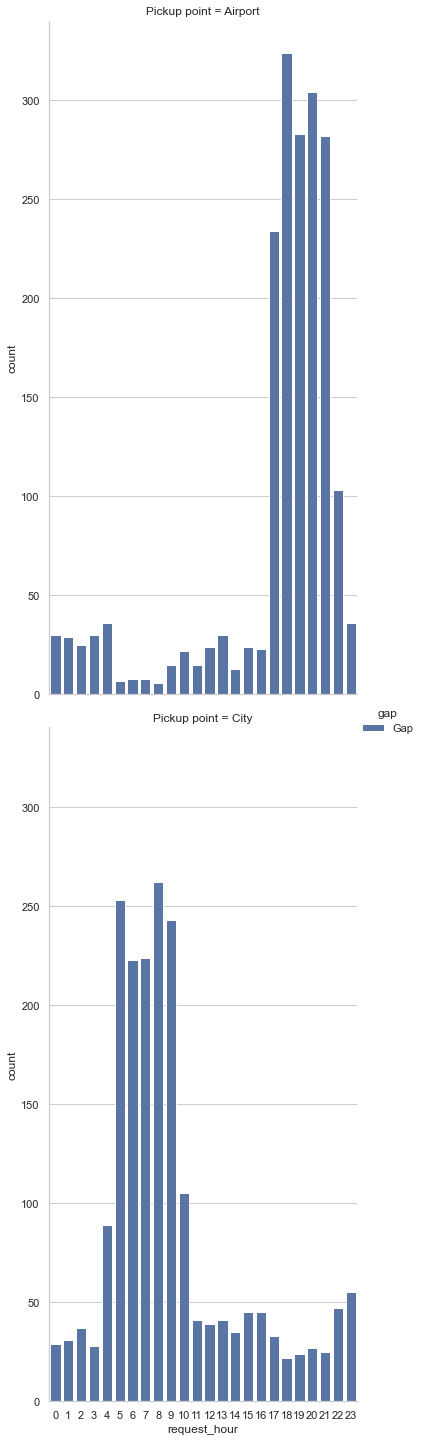

In [49]:
#Analyzing the gap across the request hour and pickup point.
sns.catplot(x='request_hour',col="Pickup point", hue = 'gap',data=df ,kind="count", height=10,aspect= 0.5,
            ci=85,col_wrap=1)
plt.show()
# At Pickup point Airport : There are highest gap b/w 5pm to 10 pm
# At Pickup point City : There are highest gap b/w 5am to 9am
# As they are rush hours

## OBSERVATIONS
**Morning Slot: There is a high demand for cabs from City to Airport, the vice versa is not true. But, the driver tends to cancel the request as higher waiting period at the airport at these time slot and getting a return trip from airport to city would be tough. so they seek chances of earning more by trip completion inside the city.**

**Evening Slot : There is a high demand for cabs from Airport to City, the vice versa is not true. But, No Cars Available for the requests made in evening. The reason looks like that there are not enough cars available to service more cars are serving inside the city. Thus, the evening time slot is most troublesome.**

## RECOMMENDATIONS
    
**1) Cabs Positioning : Position extra cabs in morning slot for city to airport trips, and in the evening slot for airport to city trips.**

**2) Advance booking : This can keep the drivers updated the schedule and so they can plan their trips accordingly.**
 
**3) Incentives : Provide incentives for the trips during peak time slots. Promote it.**

**4) Base Price : Set a base price for idle time of drivers at the airport or returning to the city without any passenger.**

**5) Penalty : Charge penalty for cancellation of requests by the drivers. Set a threshold for the maximum cancellation per day by the drivers.**